# ****MORPHOLOGICAL PROCESSING****


#### Clàudia Blasco (1709871)
#### Laura Buide (1710559)
#### Carla Cruz (1703329)
#### Laia Espluga (1710510)
#### Lucía Rodríguez (1705385).

## **1. Introduction**
- Project Objective: Explain the fundamental concepts of morphological processing in computer vision.
- Definition: Morphological processing is a technique based on set theory, mainly applied to binary images but extendable to grayscale images.
- Applications: Shape extraction, noise reduction, edge detection, object segmentation, etc.

## **2. Mathematical Foundations of Morphological Processing**

### 1. Set Theory: Understanding Sets in a Discrete Space
Morphological image processing is fundamentally based on **set theory**, where objects in a **binary image** are treated as sets of points in a **discrete space** (typically a 2D grid).  
- A **binary image** consists of pixels with values **1 (foreground, object)** and **0 (background)**.  
- The object in an image is represented as a **set of foreground pixels**, while the background is treated as the **complementary set**.  

For example, an image \( A \) containing an object can be represented as:  


$$ A = \{(x,y) \mid f(x,y) = 1\} $$


where \( f(x,y) \) is the pixel value at coordinates \( (x,y) \).  

In morphological operations, these **sets of pixels** are manipulated using **structuring elements** to **modify shapes, extract features, or remove noise**.



### 2. Structuring Elements: Definition and Interaction with the Image  
A **structuring element (SE)** is a small matrix (or kernel) that interacts with an image to **probe** and **modify** its structure.  
- It is defined as a **binary set of pixels** (typically a small square, cross, or circle).  
- The **origin (center)** of the structuring element determines how it overlaps with the image pixels.  

Mathematically, if \( B \) is a structuring element, it is defined as:  

$$ B = \{(x,y) \mid b(x,y) = 1\}$$

where \( b(x,y) \) represents the pixel values of the structuring element.

#### *How the Structuring Element Interacts with an Image*  
- It is **placed over each pixel of the image**, aligning its center with the pixel.  
- Depending on the operation (erosion, dilation, etc.), the interaction between the structuring element and the underlying pixels **modifies the image**.  

For example, a **3×3 cross-shaped structuring element**:


$$ B =
\begin{bmatrix}
0 & 1 & 0 \\
1 & 1 & 1 \\
0 & 1 & 0
\end{bmatrix}
$$

This structuring element is commonly used for morphological operations like **dilation** and **erosion**.

### 3. Basic Set Operations in Morphological Processing  
Morphological processing uses fundamental **set operations** to manipulate images:

#### 3.1 Intersection (A ∩ B)  
- Finds **common pixels** between two sets (or binary images).  
- In morphological processing, intersection can be used to **detect overlapping objects**.  

Mathematically:

$$ A \cap B = \{(x,y) \mid (x,y) \in A \text{ and } (x,y) \in B\} $$

#### 3.2 Union (A ∪ B)  
- Combines pixels from both sets, **merging objects** in an image.  
- Used in **image fusion or combining binary masks**.  

Mathematically:

$$ A \cup B = \{(x,y) \mid (x,y) \in A \text{ or } (x,y) \in B\}$$

#### 3.3 Complement (¬A)  
- **Inverts the image** by flipping foreground and background.  
- Used to **highlight objects against the background** or **prepare images for further processing**.  

Mathematically:

$$ \neg A = \{(x,y) \mid (x,y) \notin A\}$$

### Application of These Operations in Morphology  
This **mathematical foundation** forms the basis for morphological operations like **erosion, dilation, opening, and closing**, which are essential for **shape analysis, noise removal, and feature extraction** in image processing. 


Here’s a Python code that demonstrates the mathematical applications for morphological image processing. This code applies fundamental morphological operations—erosion, dilation, and complementation—on a binary image, using a structuring element (kernel) to probe and modify the image’s structure.

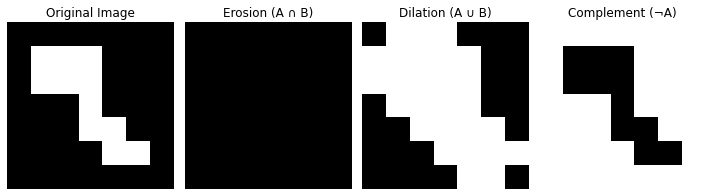

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_erosion, binary_dilation, binary_closing, binary_opening

# Create a sample binary image (foreground = 1, background = 0)
image = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0]
])

# Define a structuring element (3x3 cross-shaped)
structuring_element = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
])

# Plot the original image
plt.figure(figsize=(10, 4))
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Apply erosion (Intersection with structuring element)
eroded_image = binary_erosion(image, structure=structuring_element).astype(int)
plt.subplot(1, 4, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Erosion (A ∩ B)')
plt.axis('off')

# Apply dilation (Union with structuring element)
dilated_image = binary_dilation(image, structure=structuring_element).astype(int)
plt.subplot(1, 4, 3)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilation (A ∪ B)')
plt.axis('off')

# Apply complement (Inversion of image)
complement_image = np.logical_not(image).astype(int)
plt.subplot(1, 4, 4)
plt.imshow(complement_image, cmap='gray')
plt.title('Complement (¬A)')
plt.axis('off')

# Show all images
plt.tight_layout()
plt.show()


#### Explanation of the Code:
- **Original Image**: A 7x7 binary image with some foreground objects (1's) and background (0's).
- **Structuring Element**: A 3x3 cross-shaped structuring element used for morphological operations.
- **Erosion**: The operation of intersection between the image and the structuring element. Only pixels fully surrounded by the structuring element (1's) remain in the image.
- **Dilation**: The operation of union between the image and the structuring element. Pixels are added to the image where the structuring element overlaps.
- **Complement**: Inverts the image, changing foreground pixels (1's) to background pixels (0's) and vice versa.

#### How it connects to the mathematical applications:
- The **erosion** operation is equivalent to the intersection $(A \cap B)$, which removes pixels from the boundary of the foreground.
- The **dilation** operation is equivalent to the union $(A \cup B)$, which adds pixels to the boundary of the foreground.
- The **complement** operation inverts the image $( \neg A)$, flipping the 1's and 0's.

Running this code in a Jupyter notebook will display the original image and the results of the morphological operations, visually demonstrating the mathematical concepts of intersection, union, and complement.

## **3. Basic Morphological Operations**
Morphological processing is a technique used in image processing to modify and analyze shapes in an image. It works mainly with binary images (black-and-white images) and uses a structuring element, which is a small shape that interacts with objects in the image. 

The four basic operations are Erosion, Dilation, Opening, and Closing.

### 1. Erosion: Making Objects Smaller

Erosion is a process that shrinks (become or make smaller in size or amount) objects in an image. It works by removing pixels from the edges of objects based on the structuring element. If the structuring element does not fully fit inside the object, that part of the object disappears.

**Uses of Erosion**:
- Removes small details or noise from an image.
- Separates objects that are touching.
- Makes objects look thinner.

**Example**: If you apply erosion to a text image, the letters will become thinner.

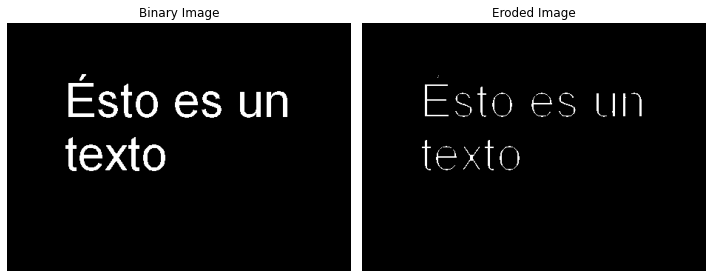

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Convert to binary image (ensure background is black and text is white)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Define the kernel for erosion
kernel = np.ones((4, 4), np.uint8)  # Kernel size 4x4

# Apply erosion
eroded = cv2.erode(binary, kernel, iterations=1)

# Display the original and eroded images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(binary, cmap='gray')
plt.title("Binary Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(eroded, cmap='gray')
plt.title("Eroded Image")
plt.axis("off")

plt.tight_layout()
plt.show()


### 2. Dilation: Making Objects Bigger
Dilation is the opposite of erosion. Instead of removing pixels, it adds pixels to the edges of objects, making them larger. If any part of the structuring element touches the object, the object grows in size.

**Uses of Dilation**:
- Fills small holes inside objects.
- Connects broken parts of an object.
- Makes objects thicker.

**Example**: If you apply dilation to a broken line, the gaps will be filled, making it a complete line.



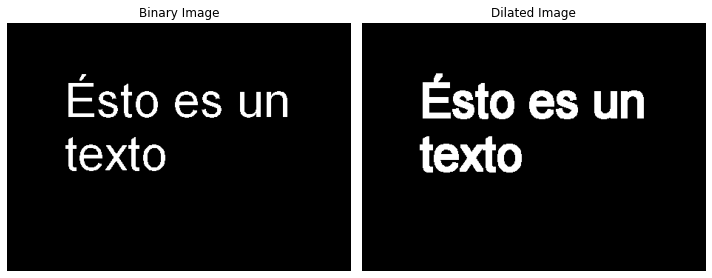

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Convert to binary image (ensure background is black and text is white)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Define the kernel for dilation
kernel = np.ones((4, 4), np.uint8)  # Kernel size 4x4

# Apply dilation
dilated = cv2.dilate(binary, kernel, iterations=1)

# Display the original and dilated images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(binary, cmap='gray')
plt.title("Binary Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(dilated, cmap='gray')
plt.title("Dilated Image")
plt.axis("off")

plt.tight_layout()
plt.show()

### 3. Opening: Removing Small Objects
Opening is a combination of erosion followed by dilation.

First, erosion removes small objects (such as noise).
Then, dilation restores the main shapes of the image.

**Uses of Opening**:
- Removes random small white dots (noise).
- Helps smooth object boundaries.
- Keeps important parts of the image while removing unwanted details.

**Example**: If an image has small white specks (like dust on a black background), opening can remove them.

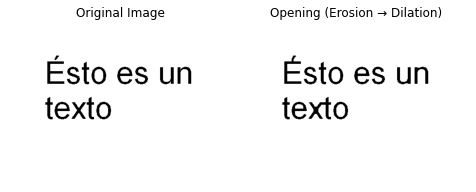

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Verify if the image loaded correctly
if image is None:
    raise FileNotFoundError("⚠️ Image not found. Check the filename and path.")

# Convert to binary (Thresholding)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define a structuring element (kernel)
kernel = np.ones((5,5), np.uint8)  

# Apply Morphological Opening (Erosion followed by Dilation)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# Display the original and processed images
titles = ["Original Image", "Opening (Erosion → Dilation)"]
images = [binary, opening]

plt.figure(figsize=(10, 5))
for i in range(len(images)):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


### 4. Closing: Filling Small Gaps
Closing is the opposite of opening. It is a dilation followed by erosion.

First, dilation expands the objects, filling small holes and gaps.
Then, erosion restores the original shape without bringing back the gaps.

**Uses of Closing**:
- Fills small holes in an image.
- Connects objects that are close together.
- Makes object boundaries smoother.

**Example**: If an object has tiny black holes inside, closing will fill them up, making the object solid.

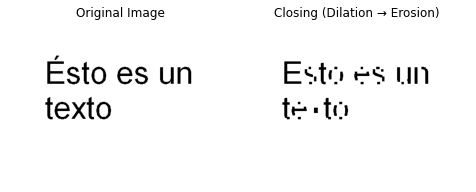

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Verify if the image loaded correctly
if image is None:
    raise FileNotFoundError("⚠️ Image not found. Check the filename and path.")

# Convert to binary (Thresholding)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define a structuring element (kernel)
kernel = np.ones((5,5), np.uint8)  

# Apply Morphological Closing (Dilation followed by Erosion)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Display the original and processed images
titles = ["Original Image", "Closing (Dilation → Erosion)"]
images = [binary, closing]

plt.figure(figsize=(10, 5))
for i in range(len(images)):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

## **4. Advanced Morphological Operations**
Advanced morphological operations extend basic transformations like erosion and dilation to more complex image processing tasks. These operations are widely used in computer vision, medical imaging, and pattern recognition. 

The main advanced operations include Morphological Gradient, Top-Hat/Black-Hat and Skeletonization.

### 1. Morphological Gradient

Morphological Gradient is a process that highlights the edges of objects by subtracting the eroded version of an image from the dilated version.

**Uses of Morphological Gradient**:
- Edge detection
- Object boundary enhancement

**Example**: If you apply this process to a text image, it will extract the its edges.

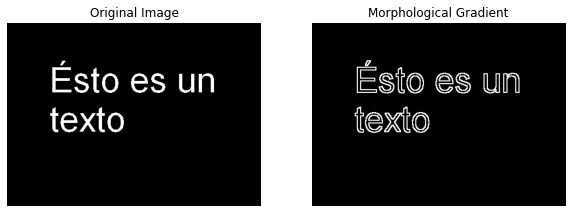

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Convert to binary image (ensure background is black and text is white)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Define the kernel for morphological operations
kernel = np.ones((3, 3), np.uint8)

# Calculate the morphological gradient
gradient = cv2.morphologyEx(binary, cv2.MORPH_GRADIENT, kernel)

# Display the original and gradient images
plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(binary, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Display gradient image
plt.subplot(1, 2, 2)
plt.imshow(gradient, cmap='gray')
plt.title("Morphological Gradient")
plt.axis("off")

plt.show()

### 2. Top-Hat Transformation

Top-Hat is a transformation that extracts small bright regions from the image by subtracting the opened image from the original.

**Uses of Top-Hat Transformation**:
- Enhancing bright details.
- Enhancing contrast (useful for faded or scanned text)

**Example**: If you apply this process to a text image with an uneven background, it will enhance the text while removing background noise.

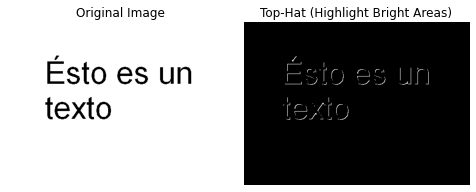

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Verify if the image loaded correctly
if image is None:
    raise FileNotFoundError("⚠️ Image not found. Check the filename and path.")

# Convert to binary (Thresholding)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define a structuring element (kernel)
kernel = np.ones((4,4), np.uint8)  

# Apply Top-Hat Transform (Extracts bright regions)
tophat = cv2.morphologyEx(binary, cv2.MORPH_TOPHAT, kernel)

# Display the original and processed images
titles = ["Original Image", "Top-Hat (Highlight Bright Areas)"]
images = [binary, tophat]

plt.figure(figsize=(10, 5))
for i in range(len(images)):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

### 3. Black-Hat Transformation

Black-Hat is a transformation that extracts dark regions by subtracting the original image from its closed version.

**Uses of Black-Hat Transformation**:
- Detecting dark regions in a bright background.
- Removing uneven shadows in text images.

**Example**: If you apply this process to a text image with an light background, it will extract shadows and dark areas, making the text more distinguishable. Similar to Top-Hat Transformations, it also removes background noise.

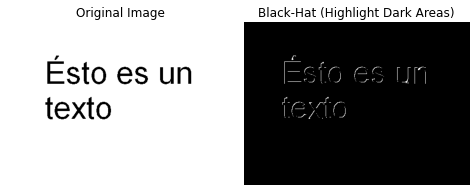

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Verify if the image loaded correctly
if image is None:
    raise FileNotFoundError("⚠️ Image not found. Check the filename and path.")

# Convert to binary (Thresholding)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define a structuring element (kernel)
kernel = np.ones((4,4), np.uint8)  

# Apply Black-Hat Transform (Extracts dark regions)
blackhat = cv2.morphologyEx(binary, cv2.MORPH_BLACKHAT, kernel)

# Display the original and processed images
titles = ["Original Image", "Black-Hat (Highlight Dark Areas)"]
images = [binary, blackhat]

plt.figure(figsize=(10, 5))
for i in range(len(images)):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

### 4. Skeletonization

This process reduces objects to their thin, connected centerlines, preserving topology.

**Uses of Skeletonization**:
- Reducing text to its centerlines.
- Character recognition and feature extraction.

**Example**: If you apply this process to a text image, it will thin the letters to their minimal representation while preserving connectivity.

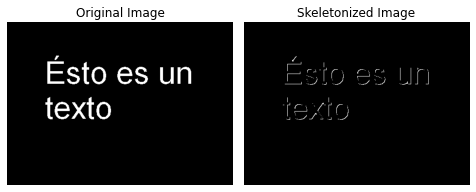

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Convert to binary image (ensure background is black and text is white)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Fast skeletonization with OpenCV
binary_skel = binary.copy()
skel = np.zeros(binary_skel.shape, np.uint8)
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

while True:
    eroded_temp = cv2.erode(binary_skel, element)
    temp = cv2.dilate(eroded_temp, element)
    temp = cv2.subtract(binary_skel, temp)
    skel = cv2.bitwise_or(skel, temp)
    binary_skel = eroded_temp.copy()
    if cv2.countNonZero(binary_skel) == 0:
        break

# Display the skeletonized image
titles = ["Original Image", "Skeletonized Image"]
images = [binary, tophat]

plt.figure(figsize=(10, 5))
for i in range(len(images)):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

### 5. Watershed Segmentation

This process is a powerful image processing technique used for separating overlapping or touching objects in an image. It is based on the concept of topography, where an image is treated as a 3D surface with ridges and valleys. The watershed algorithm floods the valleys (low-intensity regions) and progressively fills them until boundaries between objects are detected.

**Uses of Watershed Segmentation**:
- Medical Imaging: Used for segmenting organs, tumors, and cells in radiological scans and microscopic images.

- Object Detection: Helps in separating touching objects in images, such as coins, cells, or grains.

- Document Analysis: Useful for segmenting overlapping text or symbols.

**Example**: If you apply this process to a text image, it will help in segmenting overlapping or touching letters, making character recognition more accurate.

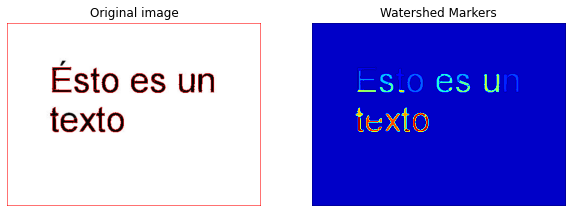

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'test.jpg'
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    raise FileNotFoundError(f"Could not load image at {image_path}")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Convert to binary image
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Remove small noise
kernel = np.ones((3,3), np.uint8)
binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area using dilation
sure_bg = cv2.dilate(binary, kernel, iterations=3)

# Distance transform to find sure foreground area
dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
num_labels, markers = cv2.connectedComponents(sure_fg)

# Add 1 to all labels so that sure background is not 0, but 1
markers = markers + 1

# Mark the region of unknown with zero
markers[unknown == 255] = 0

# Apply Watershed
markers = cv2.watershed(image, markers)
image[markers == -1] = [0, 0, 255]  # Mark boundaries in red

# Show the results
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(markers, cmap='jet')
plt.title("Watershed Markers")
plt.axis("off")

plt.show()


### 6. Counting Grains

Morphological transformations help in counting grains by using image processing techniques such as thresholding, erosion, dilation, and segmentation to separate and detect individual grains in an image.

**Uses of Counting Grains**:
- Agriculture: Counting rice, wheat, or seed grains for quality control.
- Food Industry: Measuring grain size and distribution.
- Material Science: Analyzing granular substances like powders.
- Biology & Microscopy: Counting cells or microscopic particles.

**Example**: If you use this transformation on an image with visible grains (in the following example, grains of rice), it can provide an approximate count of the grains in the picture.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread("rice.jpeg", cv2.IMREAD_GRAYSCALE)

# Resize image to speed up processing (reducing by 75%)
scale_percent = 25  # Reduce the image size to 25% of original
width = image.shape[1] * scale_percent // 100
height = image.shape[0] * scale_percent // 100
image = cv2.resize(image, (width, height), interpolation=cv2.INTER_NEAREST)

# Apply a fast threshold (fixed value instead of Otsu's)
_, thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

# Apply quick morphological opening to clean noise
kernel = np.ones((2, 2), np.uint8)  
cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

# Find contours (fastest method)
contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Draw contours on the original resized image
output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(output, contours, -1, (0, 255, 0), 1)

# Print total rice grain count
print(f"Total rice grains counted: {len(contours)}")

# Display images inline
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(thresh, cmap="gray")
axes[0].set_title("Thresholded Image")
axes[0].axis("off")

axes[1].imshow(output)
axes[1].set_title("Detected Rice Grains")
axes[1].axis("off")

plt.show()

## **6. Applications and Use Cases**


### 1. Computer Vision: Object recognition in medical, industrial, and security images.

Morpholigcal processing can help in the computer vision in different fields:

In the medical field, it's useful to detect and segment atomic structures. For instance, it improves cells and tissues microscopy images as  edges are more accurate, enhances tumor detection, since it allows the refinement of contours in mammograms or magnetic resonances, and helps with noise removal. To achieve these applications, we use opening and closing to remove noise and improve segmentation and dilation and erosion to highlight structures or remove unwanted details.

In industry, it's useful for quality control, as it detects defects, such as product imperfections like twists or holes in pieces. It can also detect failures in the textile structure sand it can automatically count transported products.

### 2. Image Reconstruction: Noise removal and image quality enhancement.

Morphological processing plays a significant role in image reconstruction. Many images, especially those captured under noisy environments, can benefit from these morphological operations.

Noise removal is particularly beneficial when trying to clean up noisy data in medical imaging, such as MRI scans or industrial inspection images. Small, unwanted features can be removed through operations like opening, which eliminates small objects in the image while preserving the larger, more meaningful structures.

Image enhancement helps in improving the overall quality of an image, whether it's for better analysis in medical diagnostics or clearer visual data for industrial automation systems. Morphological filtering can enhance image features without introducing blurring, making edges sharper and objects more distinguishable. 

### 3. Document Processing: Text recognition in scanned documents.

## **7. Conclusion and Discussion**
- Summary of key concepts.
- Limitations of morphological processing.
- Future improvements and integration with neural networks.
- Q&A session and audience discussion.


### Summary of Key Concepts
Throughout this project, we explored the fundamental operations of erosion, dilation, opening, and closing, which are essential for tasks such as noise reduction, object segmentation, and edge detection. Additionally, we investigated advanced transformations like morphological gradient, top-hat and, black-hat transformation and skeletonization, which further enhance image analysis capabilities.